In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

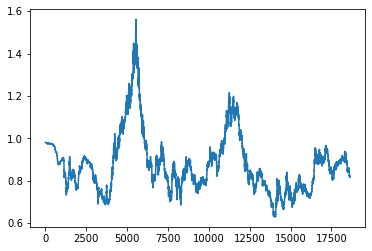

N = 18628


In [2]:
import readcsv

## get USD-EUR high price
data = readcsv.get_data()[:,2]
N = data.shape[0]

plt.plot(data)
plt.show()

print("N = %d" % N)

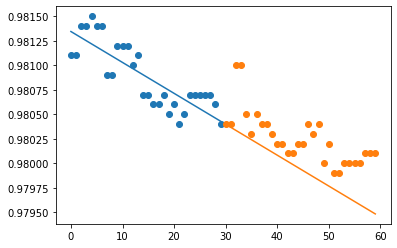

Mean squared error: 1.359e-07


In [3]:
## Sample linear fit

## ===== changable params =====
i = 30    # sets present day; cannot be smaller than (history)
history = 30   # number of points to fit on
forecast = 30   # number of points to predict
## ============================

X_train = np.arange(history).reshape(-1, 1)
X_val = np.arange(history, history+forecast).reshape(-1, 1)
y_train = data[i-history:i].reshape(-1, 1)
y_val = data[i:i+forecast].reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

plt.scatter(X_train, y_train)
plt.scatter(X_val, y_val)
plt.plot(X_train, model.predict(X_train))
plt.plot(X_val, model.predict(X_val))
plt.show()

y_pred = model.predict(X_val)
MSE = np.mean(np.square(y_pred - y_val))
print("Mean squared error: %.3e" % MSE)

In [4]:
## calculate MSE plots

history_list = [5, 10, 30, 100]
forecast_list = [5, 10, 30, 100]

streams = []

for forecast in forecast_list:
    for history in history_list:
        
        stream = []
        for i in range(100, N-100):
            
            X_train = np.arange(history).reshape(-1, 1)
            X_val = np.arange(history, history+forecast).reshape(-1, 1)
            y_train = data[i-history:i].reshape(-1, 1)
            y_val = data[i:i+forecast].reshape(-1, 1)

            model = linear_model.LinearRegression()
            model.fit(X_train, y_train)

            y_pred = model.predict(X_val)
            MSE = np.mean(np.square(y_pred - y_val))
            
            stream.append(MSE)
            
        print("forecast=%d, history=%d, average MSE=%.3e" % (forecast, history, np.mean(stream)))
            
        streams.append(stream)
        
streams = np.array(streams)

forecast=5, history=5, average MSE=1.296e-04
forecast=5, history=10, average MSE=1.140e-04
forecast=5, history=30, average MSE=1.553e-04
forecast=5, history=100, average MSE=3.530e-04
forecast=10, history=5, average MSE=3.320e-04
forecast=10, history=10, average MSE=2.417e-04
forecast=10, history=30, average MSE=2.390e-04
forecast=10, history=100, average MSE=4.236e-04
forecast=30, history=5, average MSE=2.050e-03
forecast=30, history=10, average MSE=1.180e-03
forecast=30, history=30, average MSE=7.218e-04
forecast=30, history=100, average MSE=7.476e-04
forecast=100, history=5, average MSE=1.950e-02
forecast=100, history=10, average MSE=9.904e-03
forecast=100, history=30, average MSE=4.215e-03
forecast=100, history=100, average MSE=2.427e-03


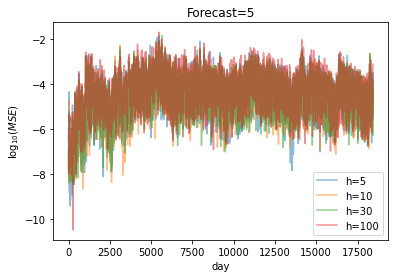

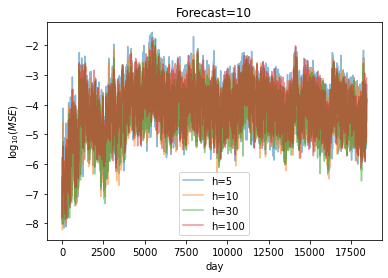

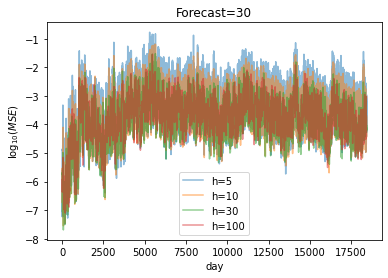

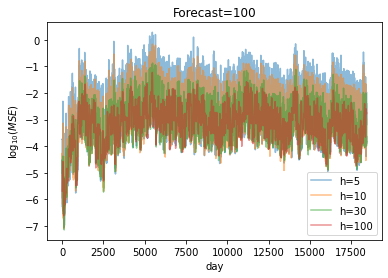

In [5]:
plt.plot(np.log10(streams[0]), alpha=.5, label="h=5")
plt.plot(np.log10(streams[1]), alpha=.5, label="h=10")
plt.plot(np.log10(streams[2]), alpha=.5, label="h=30")
plt.plot(np.log10(streams[3]), alpha=.5, label="h=100")
plt.legend()
plt.title("Forecast=5")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

plt.plot(np.log10(streams[4]), alpha=.5, label="h=5")
plt.plot(np.log10(streams[5]), alpha=.5, label="h=10")
plt.plot(np.log10(streams[6]), alpha=.5, label="h=30")
plt.plot(np.log10(streams[7]), alpha=.5, label="h=100")
plt.legend()
plt.title("Forecast=10")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

plt.plot(np.log10(streams[8]), alpha=.5, label="h=5")
plt.plot(np.log10(streams[9]), alpha=.5, label="h=10")
plt.plot(np.log10(streams[10]), alpha=.5, label="h=30")
plt.plot(np.log10(streams[11]), alpha=.5, label="h=100")
plt.legend()
plt.title("Forecast=30")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

plt.plot(np.log10(streams[12]), alpha=.5, label="h=5")
plt.plot(np.log10(streams[13]), alpha=.5, label="h=10")
plt.plot(np.log10(streams[14]), alpha=.5, label="h=30")
plt.plot(np.log10(streams[15]), alpha=.5, label="h=100")
plt.legend()
plt.title("Forecast=100")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

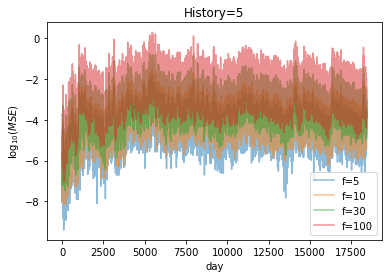

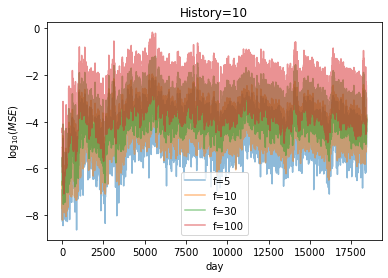

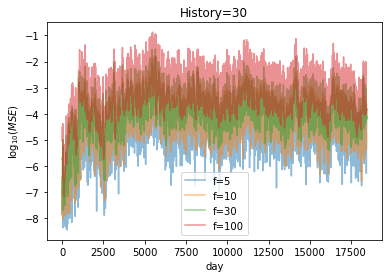

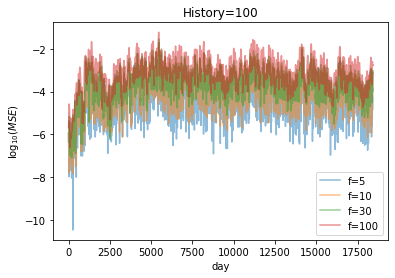

In [6]:
plt.plot(np.log10(streams[0]), alpha=.5, label="f=5")
plt.plot(np.log10(streams[4]), alpha=.5, label="f=10")
plt.plot(np.log10(streams[8]), alpha=.5, label="f=30")
plt.plot(np.log10(streams[12]), alpha=.5, label="f=100")
plt.legend()
plt.title("History=5")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

plt.plot(np.log10(streams[1]), alpha=.5, label="f=5")
plt.plot(np.log10(streams[5]), alpha=.5, label="f=10")
plt.plot(np.log10(streams[9]), alpha=.5, label="f=30")
plt.plot(np.log10(streams[13]), alpha=.5, label="f=100")
plt.legend()
plt.title("History=10")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

plt.plot(np.log10(streams[2]), alpha=.5, label="f=5")
plt.plot(np.log10(streams[6]), alpha=.5, label="f=10")
plt.plot(np.log10(streams[10]), alpha=.5, label="f=30")
plt.plot(np.log10(streams[14]), alpha=.5, label="f=100")
plt.legend()
plt.title("History=30")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

plt.plot(np.log10(streams[3]), alpha=.5, label="f=5")
plt.plot(np.log10(streams[7]), alpha=.5, label="f=10")
plt.plot(np.log10(streams[11]), alpha=.5, label="f=30")
plt.plot(np.log10(streams[15]), alpha=.5, label="f=100")
plt.legend()
plt.title("History=100")
plt.xlabel("day")
plt.ylabel("$\log_{10}(MSE)$")
plt.show()

# Comments for linear regression
- good at short-term predictions, but bad at long-term predictions (average value moves slowly)
- equal performance on short-term predictions, but more history performs better on long-term predictions

# Goals
- make a model that can make better long-term predictions

In [7]:
print("Best average MSE")
print("Forecast=5, history=10:    %.3e" % np.mean(streams[1]))
print("Forecast=10, history=30:   %.3e" % np.mean(streams[6]))
print("Forecast=30, history=30:   %.3e" % np.mean(streams[10]))
print("Forecast=100, history=100: %.3e" % np.mean(streams[15]))

Best average MSE
Forecast=5, history=10:    1.140e-04
Forecast=10, history=30:   2.390e-04
Forecast=30, history=30:   7.218e-04
Forecast=100, history=100: 2.427e-03
